In [25]:
# # Student Performance Analysis Using Python and Pandas
# 
# This project analyzes student performance across various districts based on the number of candidates, pass rates, and rankings.

# ## 1. Load Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ## 2. Load the Dataset
file_path = "pass rate.csv"  # Ensure the file is in the same directory
df = pd.read_csv('/home/vee/Documents/pass rate.csv')
df.head(100)

,Centre_num,Name,Column3,District,_Candidates,Pass_,Pass_rate,Rank
0,15100.0,ASPINDALE PARK,NaN,Glenview Mufakose,38,38,1.0000,1
1,15785.0,DIVARIS MAKAHARIS JUNIOR,NaN,Warren Park Mabelreign,16,16,1.0000,2
2,15800.0,DOMINICAN CONVENT,NaN,Mbare Hatfield,69,69,1.0000,3
3,16130.0,HAPPY PRIMARY,NaN,Northern Central,9,9,1.0000,4
4,17120.0,LUSITANIA,NaN,Mabvuku Tafara,51,51,1.0000,5
...,...,...,...,...,...,...,...,...
95,37277.0,RALPH,NaN,Goromonzi,56,54,0.9643,96
96,57680.0,SELUKWE,NaN,Shurugwi,84,81,0.9643,97
97,105730.0,DOMINICAN CONVENT,NaN,Bulawayo Central,55,53,0.9636,98
98,16400.0,GREYSTONE PARK,NaN,Northern Central,108,104,0.9630,99


In [27]:
 ## 3. Data Cleaning
# Remove unnecessary columns
df = df.drop(columns=['Column3'], errors='ignore')

# Rename columns for better readability
df = df.rename(columns={
    'Centre_num': 'Center_ID',
    '_Candidates': 'Total_Candidates',
    'Pass_': 'Passed_Students',
    'Pass_rate': 'Pass_Rate'
})

# Drop any missing values
df = df.dropna()

# Convert Rank to integer (if necessary)
df['Rank'] = df['Rank'].astype(int)

In [9]:




# ## 8. Save Cleaned Data
df.to_csv("cleaned_student_data.csv", index=False)

print("Analysis Complete! Cleaned data saved as 'cleaned_student_data.csv'.")


           Center_ID  Total_Candidates  Passed_Students    Pass_Rate  \
count    5265.000000       5265.000000      5265.000000  5265.000000   
mean    58729.981766         60.934093        28.566382     0.391896   
std     24750.031851         53.306132        40.892064     0.247327   
min     15020.000000          1.000000         0.000000     0.000000   
25%     36395.000000         29.000000         7.000000     0.200000   
50%     57335.000000         43.000000        15.000000     0.346900   
75%     77640.000000         73.000000        30.000000     0.542600   
max    109996.000000        639.000000       318.000000     1.000000   

              Rank  
count  5265.000000  
mean   2633.000000  
std    1520.018914  
min       1.000000  
25%    1317.000000  
50%    2633.000000  
75%    3949.000000  
max    5265.000000  
Total Candidates: 320818
Total Passes: 150402
Overall Pass Rate: 46.88%
                        Total_Candidates  Passed_Students  Pass_Rate
District             

In [29]:
# Total candidates and passes
total_candidates = df['Total_Candidates'].sum()
total_passes = df['Passed_Students'].sum()
overall_pass_rate = total_passes / total_candidates

print(f"Total Candidates: {total_candidates}")
print(f"Total Passes: {total_passes}")
print(f"Overall Pass Rate: {overall_pass_rate:.2%}")


Total Candidates: 320818
Total Passes: 150402
Overall Pass Rate: 46.88%


In [30]:
 ## 5. District-Wise Analysis
district_summary = df.groupby('District')[['Total_Candidates', 'Passed_Students']].sum()
district_summary['Pass_Rate'] = district_summary['Passed_Students'] / district_summary['Total_Candidates']

# Display top 5 districts by pass rate
print(district_summary.sort_values('Pass_Rate', ascending=False).head())

                        Total_Candidates  Passed_Students  Pass_Rate
District                                                            
Bulawayo Central                    1831             1642   0.896778
Mbare Hatfield                      4513             3681   0.815644
Khami                               2376             1903   0.800926
Mzilikazi                           4040             3224   0.798020
Warren Park Mabelreign              6861             5372   0.782976


In [31]:
# ##  Top and Bottom Performing Centers
top_10_centers = df.nsmallest(10, 'Rank')[['Name', 'Rank']]
bottom_10_centers = df.nlargest(10, 'Rank')[['Name', 'Rank']]

print("Top 10 Centers by Rank:")
print(top_10_centers)

print("Bottom 10 Centers by Rank:")
print(bottom_10_centers)


Top 10 Centers by Rank:
                        Name  Rank
0             ASPINDALE PARK     1
1   DIVARIS MAKAHARIS JUNIOR     2
2          DOMINICAN CONVENT     3
3              HAPPY PRIMARY     4
4                  LUSITANIA     5
5                  MARANATHA     6
6     MOTHER PATRICK CONVENT     7
7            PATHWAY PRIVATE     8
8        ST. MARTINS CONVENT     9
9  THE GRANGE CHRISTIAN SCHO    10
Bottom 10 Centers by Rank:
                   Name  Rank
5264            ZINDELE  5265
5263         KOODOOVALE  5264
5262         ST THERESA  5263
5261        RIVER BLOCK  5262
5260            PHUMUZA  5261
5259           NDUTSHWA  5260
5258              MBOMA  5259
5257           MBEMBESI  5258
5256  LUBHANGWE PRIMARY  5257
5255           GWATEMBA  5256


In [28]:
# ## 4. Exploratory Data Analysis
# Summary statistics
print(df.describe())

           Center_ID  Total_Candidates  Passed_Students    Pass_Rate  \
count    5265.000000       5265.000000      5265.000000  5265.000000   
mean    58729.981766         60.934093        28.566382     0.391896   
std     24750.031851         53.306132        40.892064     0.247327   
min     15020.000000          1.000000         0.000000     0.000000   
25%     36395.000000         29.000000         7.000000     0.200000   
50%     57335.000000         43.000000        15.000000     0.346900   
75%     77640.000000         73.000000        30.000000     0.542600   
max    109996.000000        639.000000       318.000000     1.000000   

              Rank  
count  5265.000000  
mean   2633.000000  
std    1520.018914  
min       1.000000  
25%    1317.000000  
50%    2633.000000  
75%    3949.000000  
max    5265.000000  


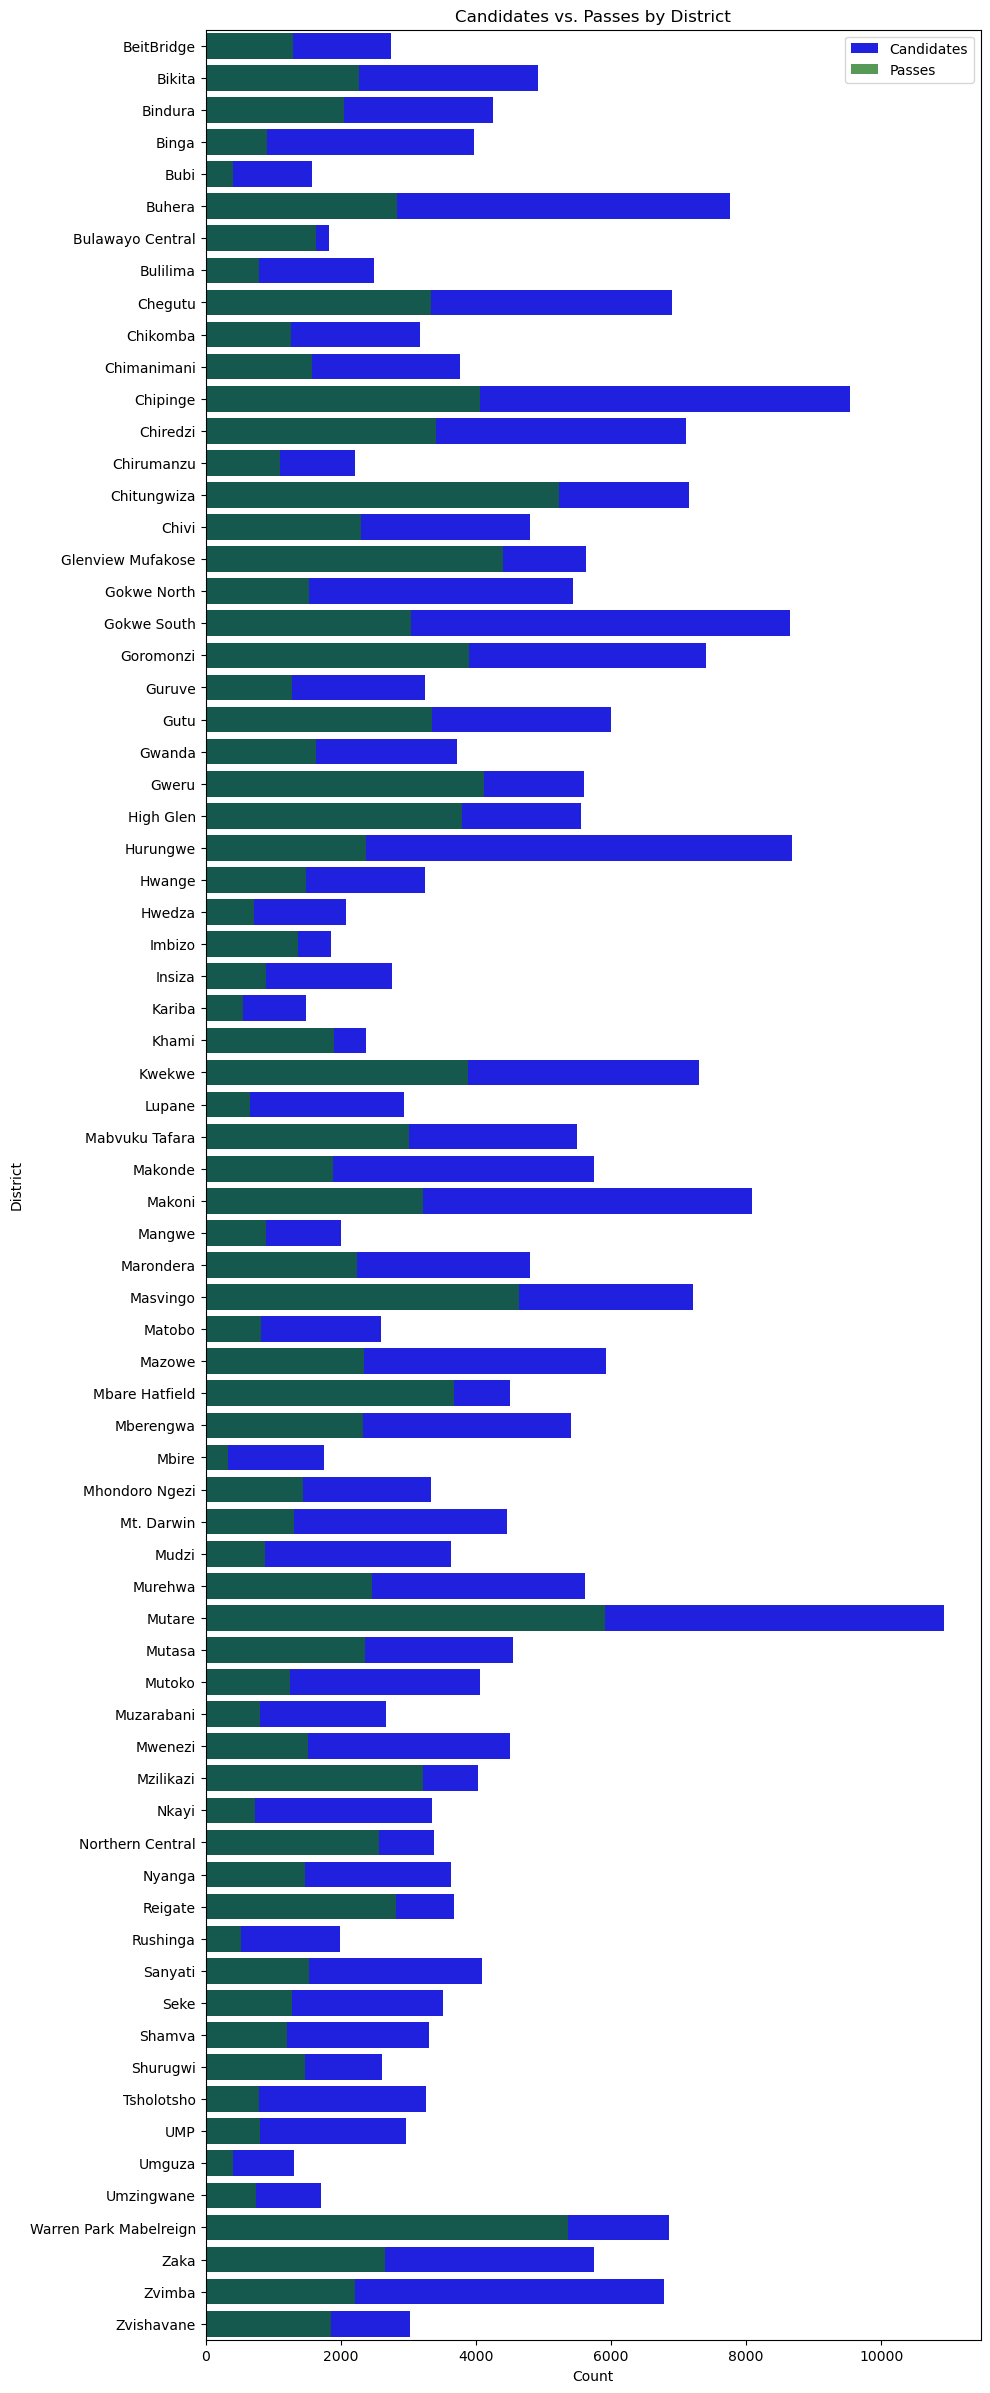

In [19]:
plt.figure(figsize=(10,30))
sns.barplot(data=district_summary, x='Total_Candidates', y=district_summary.index, color='blue', label='Candidates')
sns.barplot(data=district_summary, x='Passed_Students', y=district_summary.index, color='green', label='Passes', alpha=0.7)
plt.xlabel("Count")
plt.ylabel("District")
plt.legend()
plt.title("Candidates vs. Passes by District")
plt.show()


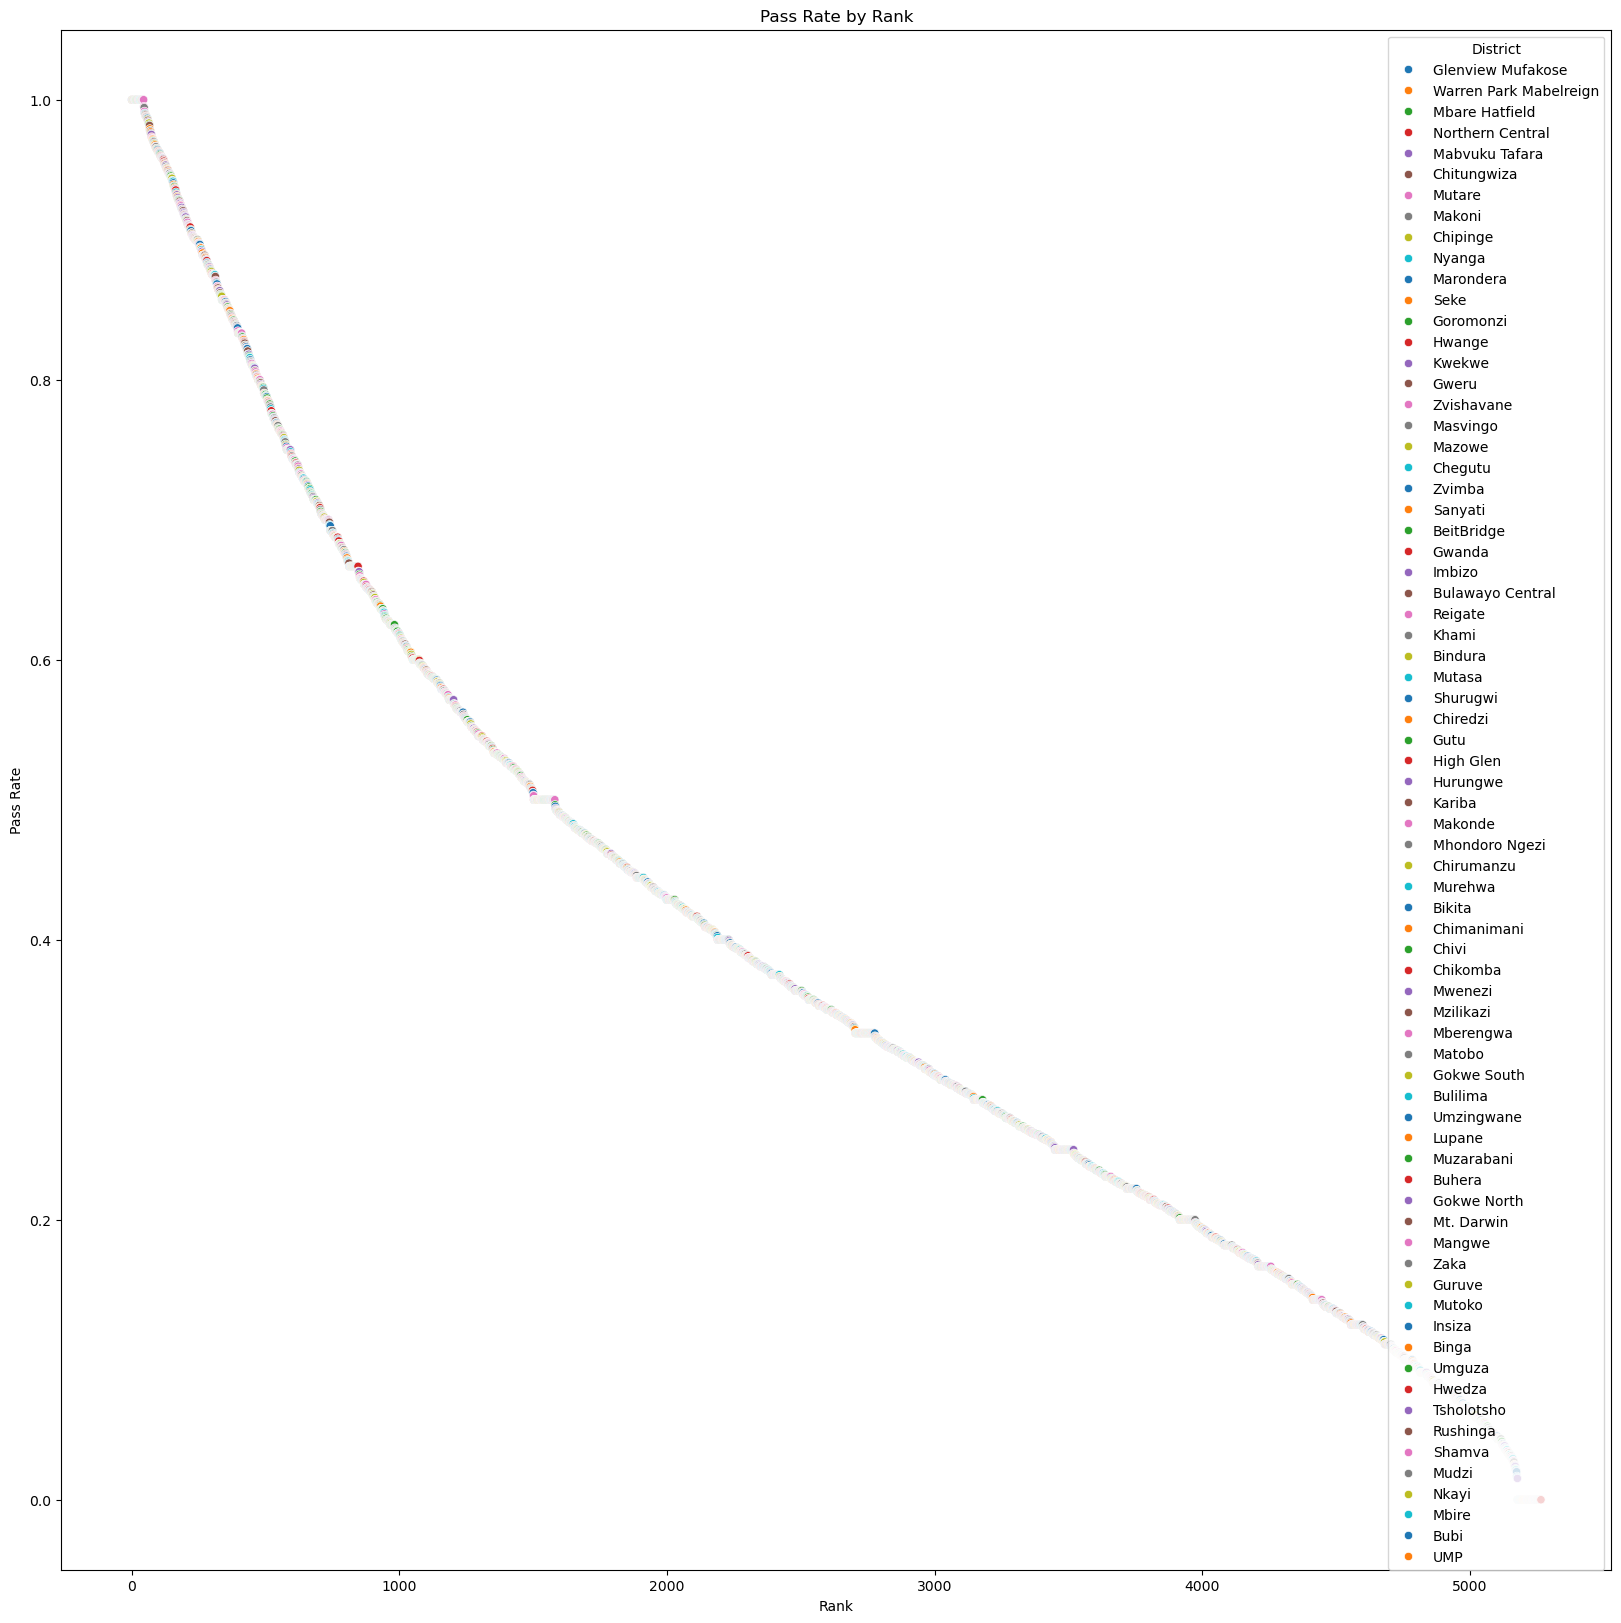

In [33]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df, x='Rank', y='Pass_Rate', hue='District', palette='tab10')
plt.xlabel("Rank")
plt.ylabel("Pass Rate")
plt.title("Pass Rate by Rank")
plt.show()

In [32]:
# Save Cleaned Data
df.to_csv("cleaned_student_data.csv", index=False)

print("Analysis Complete! Cleaned data saved as 'cleaned_student_data.csv'.")

Analysis Complete! Cleaned data saved as 'cleaned_student_data.csv'.
